In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ratings = pd.read_csv("data/animelists_cleaned.csv", 
                      usecols = ['username', 'anime_id', 'my_watched_episodes','my_score'])

In [3]:
ratings.columns

Index(['username', 'anime_id', 'my_watched_episodes', 'my_score'], dtype='object')

In [4]:
cluster_tb = pd.pivot_table(ratings, index= 'username', columns='anime_id', values= 'my_score', fill_value= 0)

In [5]:
cluster_tb.shape

(108709, 6668)

In [6]:
from sklearn.decomposition import PCA

pca = PCA()

In [13]:
user_grouped = ratings["username"].value_counts()

In [15]:
len(user_grouped[user_grouped > 5])

106499

In [14]:
anime_grouped = ratings["anime_id"].value_counts()

In [23]:
len(anime_grouped[anime_grouped>10])

6529

In [7]:
ratings_pca = pca.fit_transform(cluster_tb)

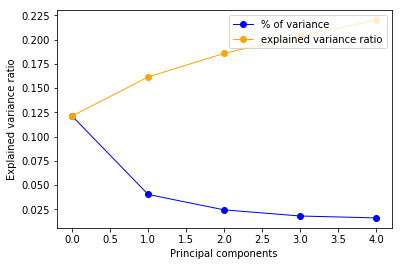

In [11]:
plt.plot(range(0, 5), pca.explained_variance_ratio_[:5], 'ro-', 
         linewidth=1, color = "blue", label = "% of variance")
plt.plot(range(0, 5), np.cumsum(pca.explained_variance_ratio_[:5]) , 
         'ro-', linewidth=1, color = "orange" , label = "explained variance ratio")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'upper right')
#plt.xlim([1,142])
plt.show()

(-2, 2)

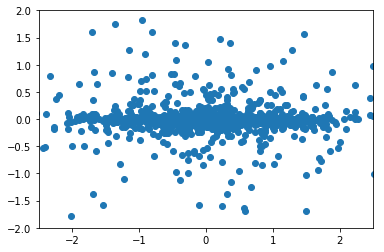

In [22]:
plt.scatter(ratings_pca[0], ratings_pca[1])
plt.xlim(-2.5, 2.5)
plt.ylim(-2, 2)